<div style="background-color:Maroon;">
   
<br>    
<p style="text-align:center">
    <a href="https://www.troy.edu/" target="_blank">
    <img src="https://www.troy.edu/_resources/images/troy-logo-svg.svg" width="200" alt="Troy University Logo"  /> 
    </a>
</p>
<br> 
<p style="text-align:center">
<h1 style="color:White;line-height:.2"><center>MSIR Capstone </center> </h1>
<h3 style="color:White;line-height:.2"><center>Allison Moore</center> </h3>
<h2 style="color:White;line-height:.8"><center>October 2022</center> </h2>  
</p>
</div>


<div style="background-color:Black;">
    <h6> </h6>   
<h3 style="color:White;line-height:1.3""><center>Administrative Tasks & Data Wrangling </center> </h3>

</div>


In [83]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.api as sm

In [2]:
#Define a function to normalize a column of data
def normal(col):
    temp=[]
    least=np.min(col)
    most=np.max(col)
    for i in col:
        n=((i)-least)/(most-least)
        temp.append(n)
    return temp

#Define a function to normalize an entire DataFrame
def normal_DF(d):
    normalized_df=d
    yr=d['End Year']
    for colName, colValue in d.iteritems():
        normalized_df[colName]=normal(colValue)
    normalized_df['End Year']=yr
    return normalized_df

In [3]:
# Define a function to generate a confusion matrix 
# to identify True Positives, True Negatives, False Positives,
# and False Negatives during Machine Learning

def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4', '5', '6']); ax.yaxis.set_ticklabels(['0', '1', '2', '3', '4', '5', '6'])

In [28]:
# Two DataFrames will be utilized. Both will contain the same data.
# However, one DataFrame will utilize only numerical, normalized values
# while the second will maintain some categorical text, for ease of 
# understanding during Data Visualization.

# Read the numerical CSV file
num_df=pd.read_csv('Numerical_Data.csv')

#Normalize the numerical Data Frame
ndf=normal_DF(num_df)
num_df=pd.read_csv('Numerical_Data.csv').astype('int')
#Average each variable across each unique value of Severity.
Temp=num_df.groupby('SEV').mean()
ind=pd.Series([0,1,2,3,4,5,6])
#Reindex the new DataFrame with the values of the Severity variable.
Avg_df=Temp.set_index(ind)
Avg_df['SEV']=Temp.index

# Read the multi-type categorical CSV file
cdf=pd.read_csv('Categorical_Data.csv')



<div style="background-color:Black;">
    <h4> </h4>   
<h1 style="color:White;line-height:1.2""><center>Exploratory Data Analysis </center> </h1>

</div>


In [7]:
#Basic Information about the data
num_df.describe()

,End Year,PVV,METH,NRI,ICT,INT,DPPL,CPL,TYPE,GFP,SEV
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,2013.894895,14.279279,2.900901,47.351351,21.288288,61.018018,0.783784,0.618619,10.501502,12.822823,2.984985
std,3.341651,7.308401,0.783354,46.099679,17.265147,23.538221,0.412283,0.486457,3.720365,12.272575,1.007390
min,2005.000000,0.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2011.000000,14.000000,3.000000,8.000000,2.000000,44.000000,1.000000,0.000000,9.000000,1.000000,2.000000
50%,2015.000000,18.000000,3.000000,26.000000,31.000000,69.000000,1.000000,1.000000,11.000000,8.000000,3.000000
75%,2017.000000,20.000000,3.000000,81.000000,36.000000,78.000000,1.000000,1.000000,13.000000,22.000000,4.000000
max,2018.000000,20.000000,4.000000,149.000000,67.000000,94.000000,1.000000,1.000000,17.000000,33.000000,6.000000


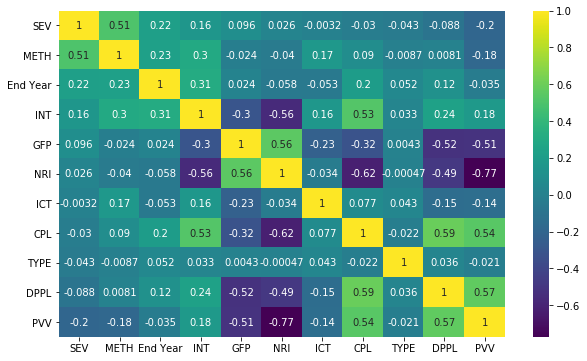

In [69]:
#Quality correlation matrix centered on Severity
k = 11 #number of variables for heatmap
cols = num_df.corr().nlargest(k, 'SEV')['SEV'].index
cm = num_df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

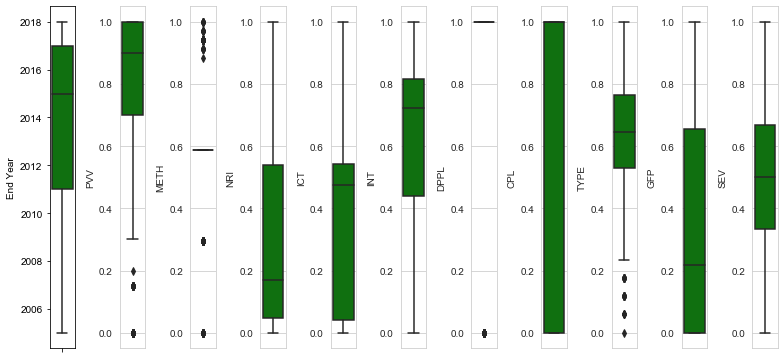

In [70]:
#Outliers

l = ndf.columns.values
number_of_columns=11
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(ndf[l[i]],color='green',orient='v')
    plt.tight_layout()

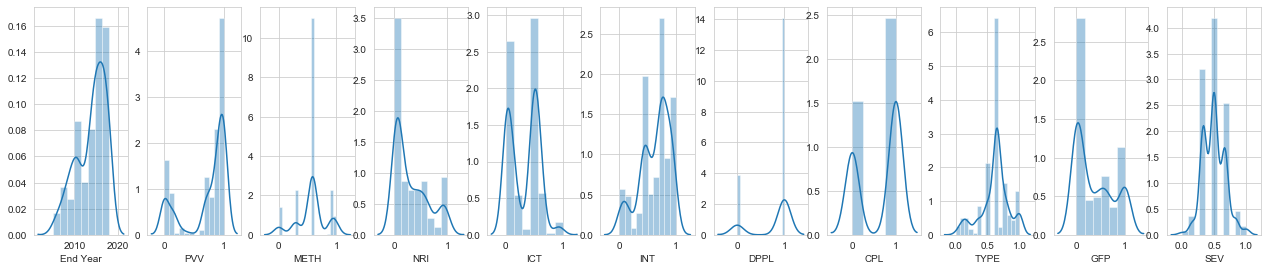

In [71]:
#Skewness

plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    try:
        sns.distplot(ndf[l[i]],kde=True) 
    except RuntimeError as re:
        if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
            sns.distplot(ndf[l[i]], kde_kws={'bw': 0.1})
        else:
            raise re

In [117]:
cdf['TYPE'].value_counts()

Government Facilities Sector                     143
Information Technology Sector                     34
Other (Election Infrastructure, Academia)         30
Financial Services Sector                         26
Energy Sector                                     21
Defense Industrial Base Sector                    19
Nuclear Reactors, Materials, and Waste Sector     13
Commercial Facilities Sector                      11
Communications Sector                             11
Transportation Systems Sector                     10
Healthcare and Public Health Sector                5
Chemical Sector                                    5
Critical Manufacturing Sector                      4
Dams Sector                                        1
Name: TYPE, dtype: int64

In [118]:
cdf['METH'].value_counts()

Network Intrusion       204
Denial of Service        42
Virus                    32
Vandalism                26
Logic bomb               10
Key Logger                9
Worm                      9
Netowrk Infiltration      1
Name: METH, dtype: int64

In [119]:
cdf['SEV'].value_counts()

3    127
2     97
4     77
5     14
1     11
6      5
0      2
Name: SEV, dtype: int64

C:\Users\sweep\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\sweep\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\sweep\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\sweep\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\sweep\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\sweep\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data

C:\Users\sweep\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\sweep\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\sweep\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\sweep\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\sweep\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\sweep\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data

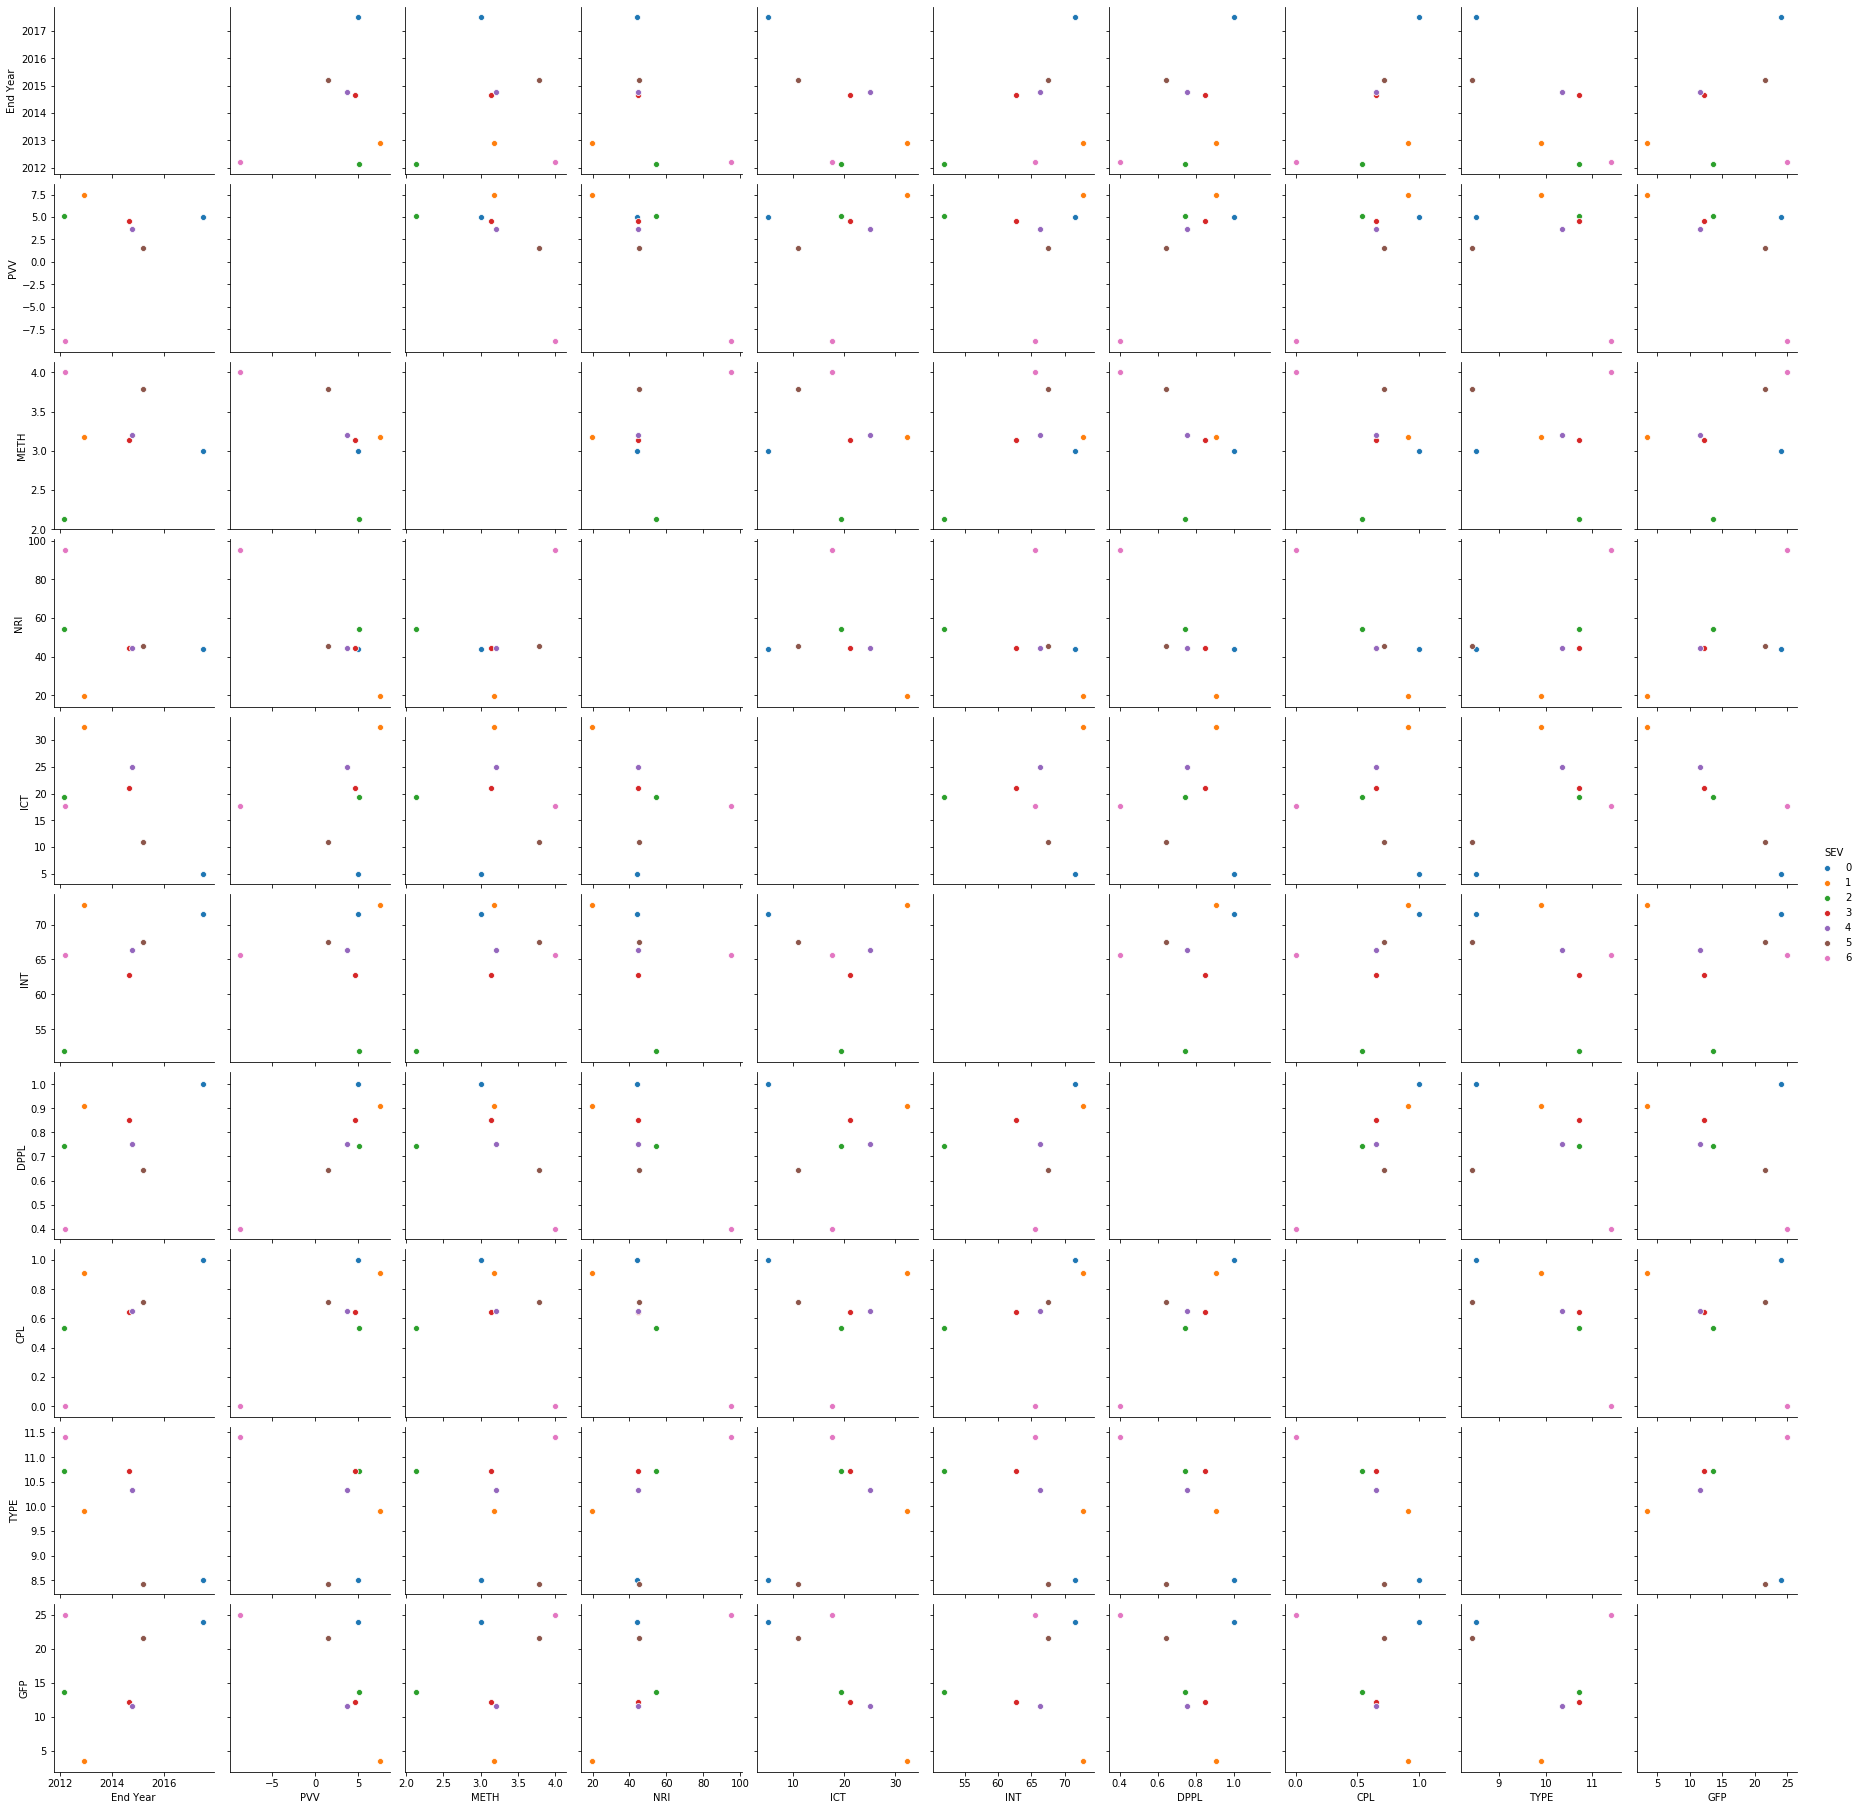

In [62]:
sns.pairplot(Avg_df,hue='SEV')
plt.show()

<div style="background-color:Black;">
    <h4> </h4>   
<h1 style="color:White;line-height:1.2""><center> Data Visualization </center> </h1>

</div>

In [63]:
Avg_df.head()

,End Year,PVV,METH,NRI,ICT,INT,DPPL,CPL,TYPE,GFP,SEV
0,2017.500000,5.000000,3.000000,44.000000,5.000000,71.500000,1.000000,1.000000,8.500000,24.000000,0
1,2012.909091,7.454545,3.181818,19.545455,32.363636,72.818182,0.909091,0.909091,9.909091,3.454545,1
2,2012.144330,5.103093,2.134021,54.381443,19.371134,51.845361,0.742268,0.536082,10.721649,13.608247,2
3,2014.653543,4.574803,3.133858,44.456693,21.070866,62.732283,0.850394,0.645669,10.708661,12.173228,3
4,2014.766234,3.636364,3.207792,44.597403,25.038961,66.311688,0.753247,0.649351,10.337662,11.558442,4


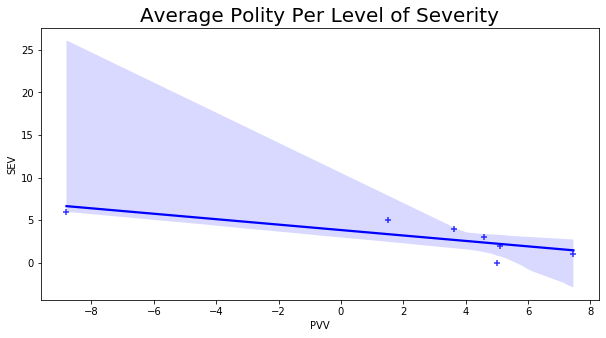

In [64]:
plt.figure(figsize=(10, 5))

sns.regplot(x='PVV', y='SEV', data=Avg_df, color='blue',ci=95, marker='+')
plt.title("Average Polity Per Level of Severity", fontsize=20)
plt.show()

In [66]:
#Normalize Severity for comparison to Binary Variables DPPL and CPL
Avg_df['SEV']=normal(Avg_df['SEV'])

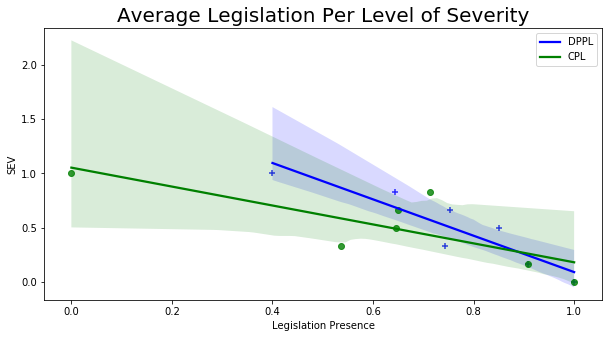

In [67]:
plt.figure(figsize=(10, 5))

sns.regplot(x='DPPL', y='SEV', data=Avg_df, color='blue',ci=95, marker='+')
sns.regplot(x='CPL', y='SEV', data=Avg_df, color='green',ci=95, marker='o')
plt.legend(['DPPL','CPL'])
plt.xlabel('Legislation Presence',fontsize=10)
plt.title("Average Legislation Per Level of Severity", fontsize=20)
plt.show()

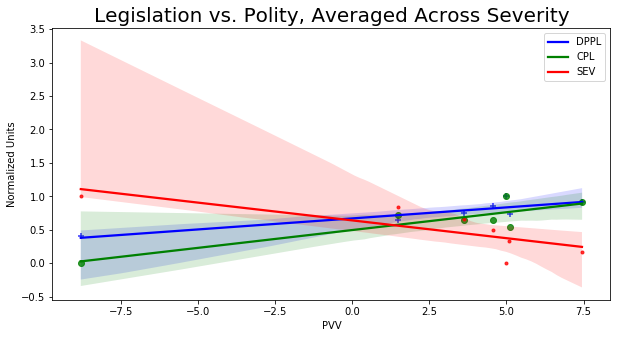

In [49]:
plt.figure(figsize=(10, 5))

sns.regplot(x='PVV', y='DPPL', data=Avg_df, color='blue',ci=95, marker='+')
sns.regplot(x='PVV', y='CPL', data=Avg_df, color='green',ci=95, marker='o')
sns.regplot(x='PVV', y='SEV', data=Avg, color='red',ci=95, marker='.')
plt.legend(['DPPL','CPL', 'SEV'], loc='upper right')
plt.ylabel('Normalized Units')
plt.title("Legislation vs. Polity, Averaged Across Severity", fontsize=20)
plt.show()

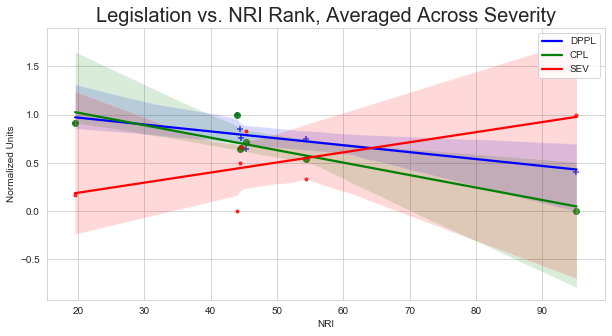

In [72]:
plt.figure(figsize=(10, 5))

sns.regplot(x='NRI', y='DPPL', data=Avg_df, color='blue',ci=95, marker='+')
sns.regplot(x='NRI', y='CPL', data=Avg_df, color='green',ci=95, marker='o')
sns.regplot(x='NRI', y='SEV', data=Avg, color='red',ci=95, marker='.')
plt.legend(['DPPL','CPL', 'SEV'], loc='upper right')
plt.ylabel('Normalized Units')
plt.title("Legislation vs. NRI Rank, Averaged Across Severity", fontsize=20)
plt.show()

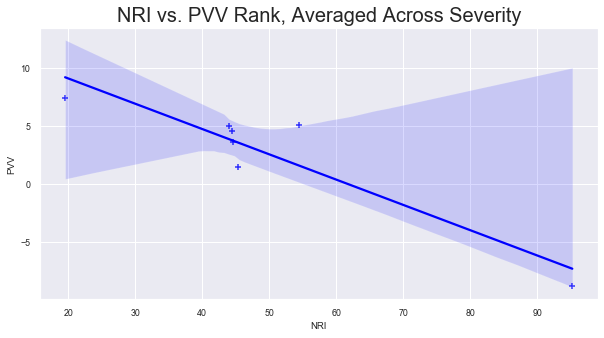

In [123]:
plt.figure(figsize=(10, 5))

sns.regplot(x='NRI', y='PVV', data=Avg_df, color='blue',ci=95, marker='+')

plt.title("NRI vs. PVV Rank, Averaged Across Severity", fontsize=20)
plt.show()

<Figure size 720x360 with 0 Axes>

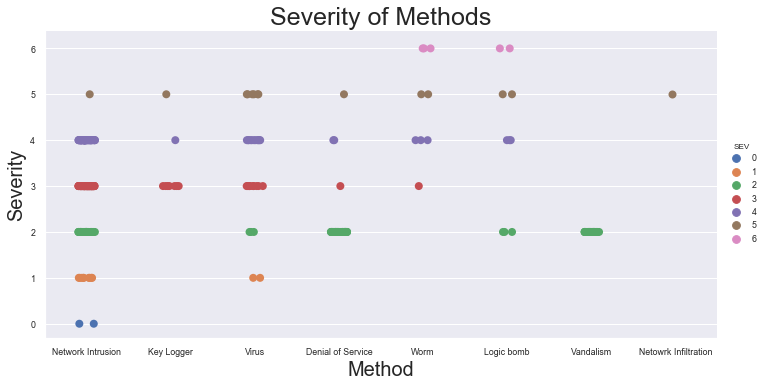

In [120]:
#Plot the averaged polity for each value of severity
plt.figure(figsize=(10, 5))

sns.set(font_scale=.8)
sns.catplot(x="METH", y='SEV',hue='SEV',data=cdf, s=8, aspect = 2)
plt.ylabel("Severity",fontsize=20)
plt.xlabel("Method",fontsize=20)
plt.title("Severity of Methods", fontsize=25)
plt.show()

<Figure size 720x360 with 0 Axes>

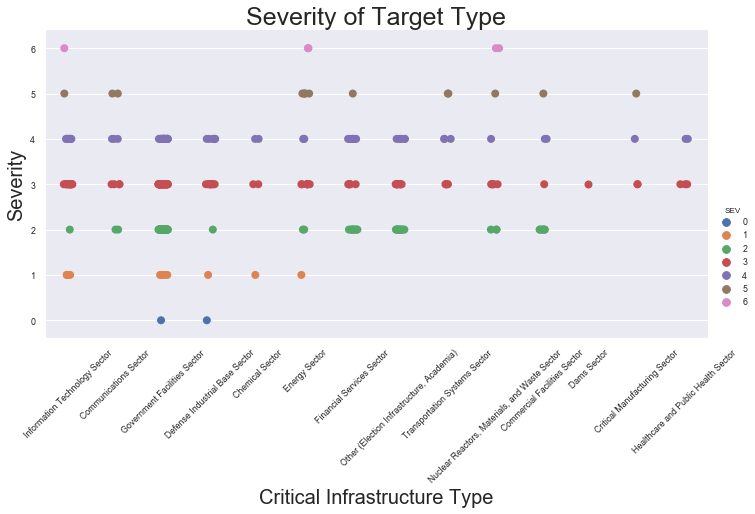

In [122]:
#Plot the averaged polity for each value of severity
plt.figure(figsize=(10, 5))

sns.set(font_scale=.8)
sns.catplot(x="TYPE", y='SEV',hue='SEV',data=cdf, s=8, aspect = 2)
plt.ylabel("Severity",fontsize=20)
plt.xlabel("Critical Infrastructure Type",fontsize=20)
plt.xticks(rotation=45)
plt.title("Severity of Target Type", fontsize=25)
plt.show()

<div style="background-color:Black;">
    <h4> </h4>   
<h1 style="color:White;line-height:1.2""><center> Machine Learning and Regression </center> </h1>

</div>

In [115]:
#Split data for standard machine learning logistic regression
x=np.asarray(ndf[['PVV','GFP','NRI','ICT','INT','DPPL','CPL','TYPE','METH']])
y=np.asarray(num_df['SEV'])
X = preprocessing.StandardScaler().fit(x).transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [85]:
a=pd.DataFrame(x)
a['SEV']=ndf['SEV']
a.to_csv('Normed_PVV Reset.csv')


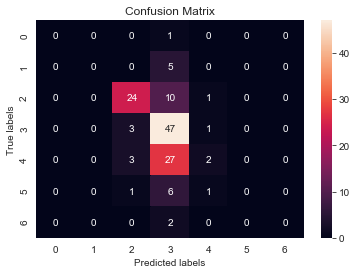

In [86]:
# Standard Logistic Regression Model Confusion Matrix
parameters ={"C":[.1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression(C=0.1, penalty='l2', solver='lbfgs')

logreg_cv = GridSearchCV(lr, parameters,cv=10, iid=None)
lreg=lr.fit(X_train,y_train)

yhat=lreg.predict(X_test)
plot_confusion_matrix(y_test,yhat)

In [87]:
# Accuracy of the Model
lreg.score(X_test, y_test)

0.5447761194029851

In [106]:
#Define independent variables for Ordinal Logistic Regression
X1=np.asarray(ndf[['PVV','GFP']])
X2=np.asarray(ndf[['GFP','NRI','ICT','INT','DPPL','CPL',]])
X3=np.asarray(ndf[['PVV','GFP','NRI','ICT','INT','DPPL','CPL',]])
X4=np.asarray(ndf[['PVV','GFP','NRI','ICT','INT','DPPL','CPL','TYPE','METH']])

<div style="background-color:Maroon;">
 
<h4 style="color:White""><center> Model 1 </center> </h4>

</div>

In [107]:
#Model 1

mod_log = OrderedModel(y,
                        X1,
                        distr='logit')

res_log = mod_log.fit(method='bfgs')
res_log.summary()

Optimization terminated successfully.
         Current function value: 1.391086
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -463.23
Model:                   OrderedModel   AIC:                             942.5
Method:            Maximum Likelihood   BIC:                             972.9
Date:                Fri, 16 Sep 2022                                         
Time:                        12:33:45                                         
No. Observations:                 333                                         
Df Residuals:                     325                                         
Df Model:                           8                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9361      0.330     -2.841      0.005      -1.582      -0.290
x2            -0.1715      0.309     -0.555      0.579      -0.777       0.434
0/1           -5.8841      0.781     -7.535      0.000      -7.415      -4.354
1/2            0.6462      0.343      1.883      0.060      -0.026       1.319
2/3            0.9227      0.109      8.465      0.000       0.709       1.136
3/4            0.4946      0.078      6.347      0.000       0.342       0.647
4/5            0.6554      0.115      5.693      0.000       0.430       0.881
5/6            0.3291      0.282      1.168      0.243      -0.223       0.881
==============================================================================
"""

In [108]:
#Calculate Accuracy of the Model
predicted = res_log.model.predict(res_log.params, exog=X1)
pred_choice = predicted.argmax(1)
print('Fraction of correct choice predictions, Model 1:')
print((np.asarray(num_df['SEV'].values) == pred_choice).mean())

Fraction of correct choice predictions, Model 1:
0.3813813813813814


<div style="background-color:Maroon;">
 
<h4 style="color:White""><center> Model 2 </center> </h4>

</div>

In [109]:
#Model 2

mod_log = OrderedModel(y,
                        X2,
                        distr='logit')

res_log = mod_log.fit(method='bfgs')
res_log.summary()

Optimization terminated successfully.
         Current function value: 1.377360
         Iterations: 57
         Function evaluations: 59
         Gradient evaluations: 59


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -458.66
Model:                   OrderedModel   AIC:                             941.3
Method:            Maximum Likelihood   BIC:                             987.0
Date:                Fri, 16 Sep 2022                                         
Time:                        12:33:49                                         
No. Observations:                 333                                         
Df Residuals:                     321                                         
Df Model:                          12                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4056      0.376      1.080      0.280      -0.331       1.142
x2             0.3255      0.533      0.611      0.541      -0.719       1.370
x3            -0.0632      0.433     -0.146      0.884      -0.912       0.785
x4             1.9372      0.503      3.854      0.000       0.952       2.922
x5            -0.0570      0.366     -0.156      0.876      -0.774       0.660
x6            -0.2734      0.315     -0.867      0.386      -0.891       0.345
0/1           -3.9659      0.886     -4.474      0.000      -5.703      -2.228
1/2            0.6431      0.344      1.870      0.061      -0.031       1.317
2/3            0.9374      0.108      8.651      0.000       0.725       1.150
3/4            0.5176      0.078      6.623      0.000       0.364       0.671
4/5            0.6632      0.115      5.780      0.000       0.438       0.888
5/6            0.3336      0.281      1.187      0.235      -0.217       0.884
==============================================================================
"""

In [110]:
#Calculate Accuracy of the Model
predicted = res_log.model.predict(res_log.params, exog=X2)
pred_choice = predicted.argmax(1)
print('Fraction of correct choice predictions, Model 2:')
print((np.asarray(num_df['SEV'].values) == pred_choice).mean())

Fraction of correct choice predictions, Model 2:
0.39039039039039036


<div style="background-color:Maroon;">
 
<h4 style="color:White""><center> Model 3 </center> </h4>

</div>

In [111]:
#Model 3

mod_log = OrderedModel(y,
                        X3,
                        distr='logit')

res_log = mod_log.fit(method='bfgs')
res_log.summary()

Optimization terminated successfully.
         Current function value: 1.362733
         Iterations: 65
         Function evaluations: 67
         Gradient evaluations: 67


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -453.79
Model:                   OrderedModel   AIC:                             933.6
Method:            Maximum Likelihood   BIC:                             983.1
Date:                Fri, 16 Sep 2022                                         
Time:                        12:33:51                                         
No. Observations:                 333                                         
Df Residuals:                     320                                         
Df Model:                          13                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.7515      0.565     -3.100      0.002      -2.859      -0.644
x2             0.1705      0.387      0.441      0.659      -0.587       0.928
x3            -1.3045      0.748     -1.744      0.081      -2.771       0.162
x4            -0.3975      0.447     -0.889      0.374      -1.274       0.479
x5             0.9652      0.591      1.632      0.103      -0.194       2.124
x6             0.0112      0.368      0.031      0.976      -0.709       0.732
x7            -0.0339      0.326     -0.104      0.917      -0.672       0.604
0/1           -6.3682      1.178     -5.404      0.000      -8.678      -4.058
1/2            0.6429      0.344      1.869      0.062      -0.031       1.317
2/3            0.9433      0.108      8.737      0.000       0.732       1.155
3/4            0.5368      0.078      6.849      0.000       0.383       0.690
4/5            0.6800      0.114      5.942      0.000       0.456       0.904
5/6            0.3491      0.279      1.250      0.211      -0.198       0.896
==============================================================================
"""

In [112]:
#Calculate Accuracy of the Model
predicted = res_log.model.predict(res_log.params, exog=X3)
pred_choice = predicted.argmax(1)
print('Fraction of correct choice predictions, Model 3:')
print((np.asarray(num_df['SEV'].values) == pred_choice).mean())

Fraction of correct choice predictions, Model 3:
0.3783783783783784


<div style="background-color:Maroon;">
 
<h4 style="color:White""><center> Model 4 </center> </h4>

</div>

In [113]:
#Model 4

mod_log = OrderedModel(y,
                        X4,
                        distr='logit')

res_log = mod_log.fit(method='bfgs')
res_log.summary()

Optimization terminated successfully.
         Current function value: 1.212134
         Iterations: 79
         Function evaluations: 81
         Gradient evaluations: 81


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -403.64
Model:                   OrderedModel   AIC:                             837.3
Method:            Maximum Likelihood   BIC:                             894.4
Date:                Fri, 16 Sep 2022                                         
Time:                        12:33:55                                         
No. Observations:                 333                                         
Df Residuals:                     318                                         
Df Model:                          15                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9864      0.580     -1.701      0.089      -2.123       0.150
x2             0.2794      0.388      0.721      0.471      -0.480       1.039
x3            -1.1240      0.746     -1.506      0.132      -2.587       0.339
x4            -0.8151      0.460     -1.771      0.076      -1.717       0.087
x5             0.1664      0.611      0.272      0.785      -1.031       1.364
x6            -0.2696      0.374     -0.722      0.471      -1.002       0.463
x7            -0.0341      0.333     -0.102      0.918      -0.687       0.619
x8            -0.5579      0.487     -1.146      0.252      -1.513       0.397
x9             4.8978      0.532      9.208      0.000       3.855       5.940
0/1           -4.9333      1.225     -4.029      0.000      -7.333      -2.533
1/2            0.6332      0.346      1.830      0.067      -0.045       1.311
2/3            1.1579      0.104     11.175      0.000       0.955       1.361
3/4            0.7432      0.079      9.435      0.000       0.589       0.898
4/5            0.8198      0.111      7.370      0.000       0.602       1.038
5/6            0.4457      0.267      1.666      0.096      -0.079       0.970
==============================================================================
"""

In [114]:
#Calculate Accuracy of the Model
predicted = res_log.model.predict(res_log.params, exog=X4)
pred_choice = predicted.argmax(1)
print('Fraction of correct choice predictions, Model 4:')
print((np.asarray(num_df['SEV'].values) == pred_choice).mean())

Fraction of correct choice predictions, Model 4:
0.5585585585585585
